EDA

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle


In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

VISUALIZATIONS

C:\Users\Al Hafiz Enterprises\AppData\Local\Temp\ipykernel_9288\1573220355.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Exited', palette='Set2')


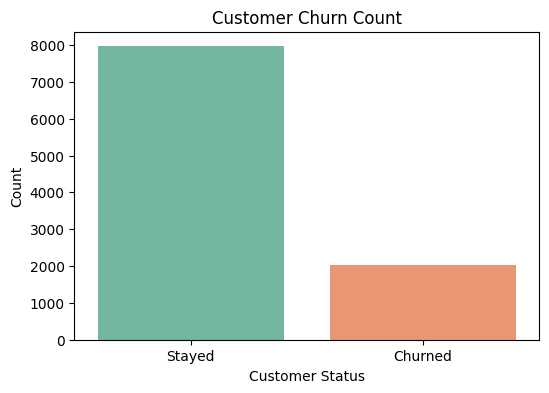

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Exited', palette='Set2')
plt.title('Customer Churn Count')
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.ylabel('Count')
plt.xlabel('Customer Status')
plt.show()


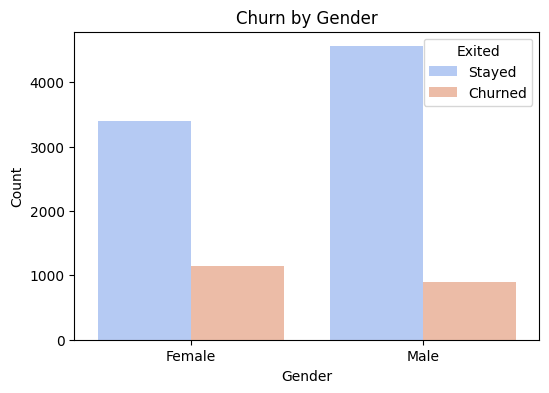

In [11]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Exited', palette='coolwarm')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed', 'Churned'])
plt.show()


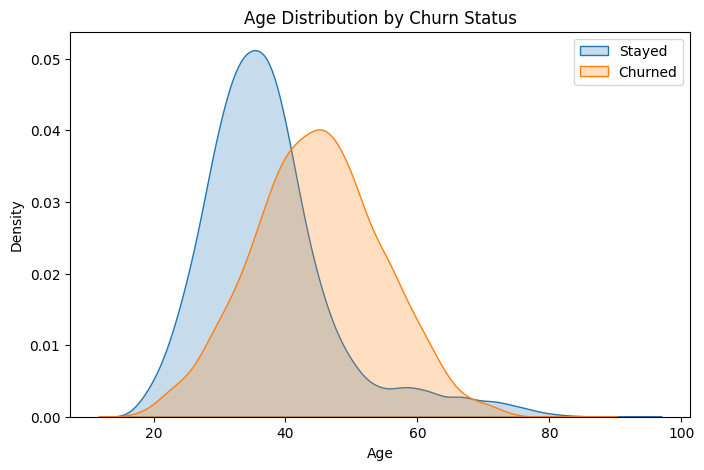

In [12]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df.Exited == 0], x='Age', label='Stayed', fill=True)
sns.kdeplot(data=df[df.Exited == 1], x='Age', label='Churned', fill=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


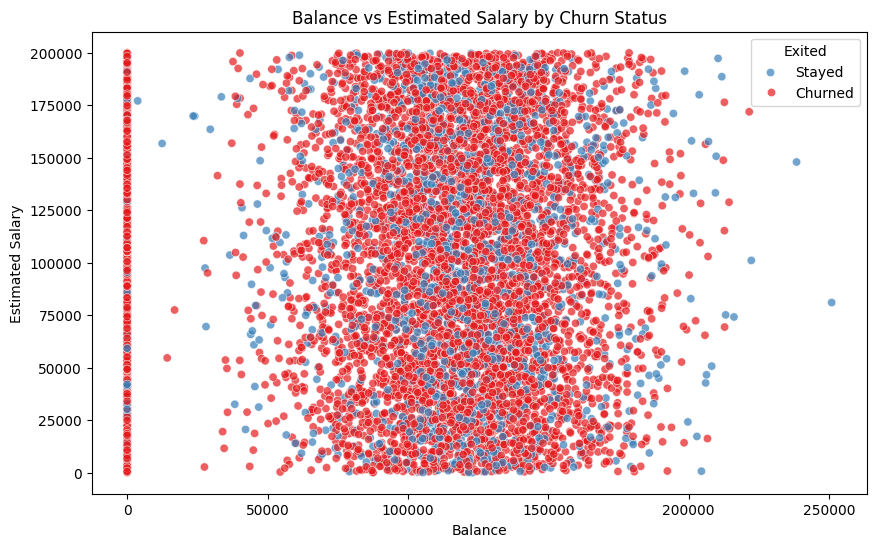

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balance', y='EstimatedSalary', hue='Exited', palette='Set1', alpha=0.7)
plt.title('Balance vs Estimated Salary by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.legend(title='Exited', labels=['Stayed', 'Churned'])
plt.show()


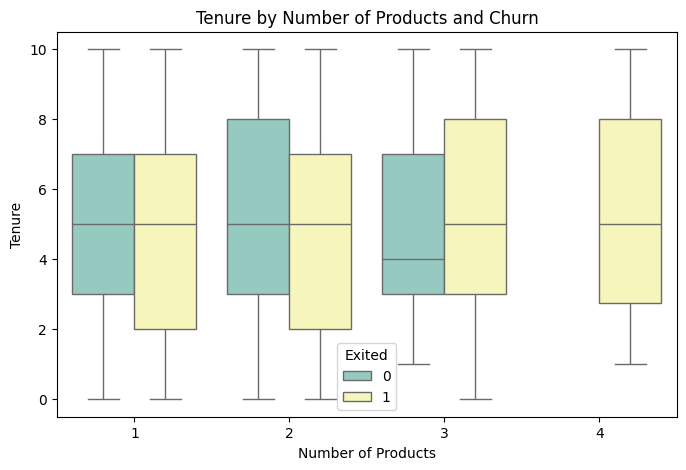

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='NumOfProducts', y='Tenure', hue='Exited', palette='Set3')
plt.title('Tenure by Number of Products and Churn')
plt.xlabel('Number of Products')
plt.ylabel('Tenure')
plt.show()


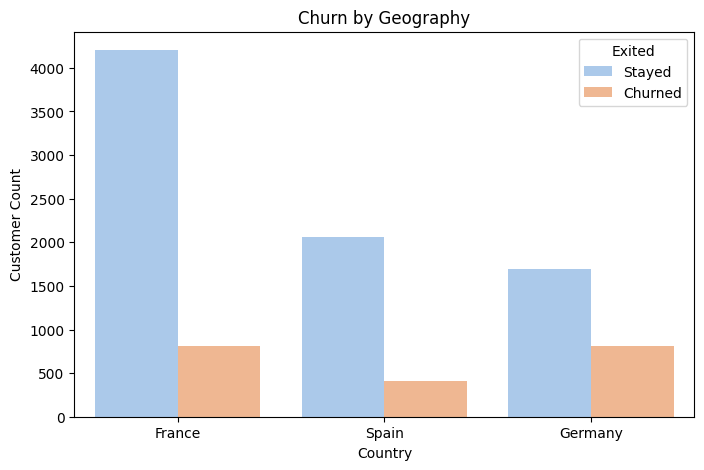

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Geography', hue='Exited', palette='pastel')
plt.title('Churn by Geography')
plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.legend(title='Exited', labels=['Stayed', 'Churned'])
plt.show()


FEATURE ENGINEERING

In [18]:
# Using Label Encoding (better for only two values) for Categorical Data i.e Gender 
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

In [19]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [20]:
# One Hot Encoding for Categorical Data i.e Geography
from sklearn.preprocessing import OneHotEncoder
onehotencoder_geography = OneHotEncoder()
geo_encoder = onehotencoder_geography.fit_transform(df[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [21]:
onehotencoder_geography.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [22]:
geo_encoded_df = pd.DataFrame(geo_encoder.toarray(),columns=onehotencoder_geography.get_feature_names_out(['Geography']))

In [23]:
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [24]:
# Concatenating the DataFrames
df = pd.concat([df,geo_encoded_df],axis=1)
df = df.drop(['Geography'],axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


SAVING OUR PICKLE FILES

In [25]:
with open('label_encoder_gender.pkl','wb') as f:
    pickle.dump(label_encoder_gender,f)

with open('onehotencoder_geography.pkl','wb') as f:
    pickle.dump(onehotencoder_geography,f)

MODEL TRAINING

In [26]:
# Selecting the Dependent and Independent Variables
X = df.drop(['Exited'],axis=1)
y = df['Exited']


# Splitting the Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [29]:
df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0.0,0.0,1.0
6,822,1,50,7,0.00,2,1,1,10062.80,0,1.0,0.0,0.0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.0,1.0,0.0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1.0,0.0,0.0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1.0,0.0,0.0
